In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

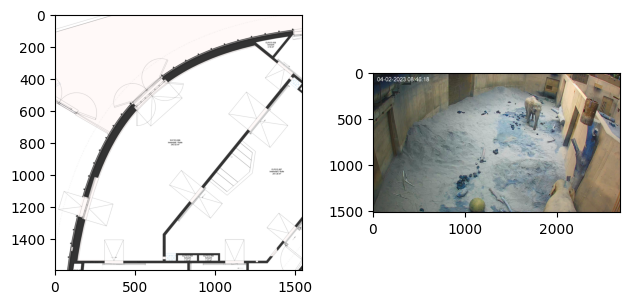

In [7]:
im_floor = cv2.imread("../data/floor_plan.png")
im_camera = cv2.imread("../data/sample_frame.png")
fig,axs = plt.subplots(1,2)
axs[0].imshow(im_floor)
axs[1].imshow(im_camera)
fig.tight_layout()

In [12]:
im_floor_draw = im_floor.copy()
im_camera_draw = im_camera.copy()

class MouseHandler:
    def __init__(self,img):
        self.img = img
        self.positions = []
    def __call__(self,event,x,y,flags,param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.positions.append((x,y))

floorClicker=MouseHandler(im_floor_draw)
cameraClicker = MouseHandler(im_camera_draw)

cv2.namedWindow("floor")
cv2.setMouseCallback("floor",floorClicker)
cv2.imshow("floor",im_floor_draw)

cv2.namedWindow("camera")
cv2.setMouseCallback("camera",cameraClicker)
cv2.imshow("camera",im_camera_draw)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

print(floorClicker.positions)
print(cameraClicker.positions)

[(1382, 310), (1473, 383), (911, 1077), (837, 1168), (703, 427), (267, 1021)]
[(1842, 265), (1974, 300), (2059, 798), (2070, 958), (1087, 272), (303, 904)]


In [114]:
def to_h(x):
    assert x.shape[-1] == 2
    xh = np.empty((x.shape[0],x.shape[1]+1))
    xh[:,:-1] = x
    xh[:,-1] = 1
    return xh.T

def from_h(xh):
    xh = xh.T
    assert xh.shape[1] == 3
    return (xh[:,0:2] / xh[:,[2]])
camera_points = np.array(cameraClicker.positions)
world_points = np.array(floorClicker.positions)

p = camera_points[[0]]
display(p.shape, p)
ph = to_h(p)
display(ph.shape, ph)
pp = from_h(ph)
display(pp.shape, pp)


(1, 2)

array([[1842,  265]])

(3, 1)

array([[1.842e+03],
       [2.650e+02],
       [1.000e+00]])

(1, 2)

array([[1842.,  265.]])

In [120]:
2688/1061,1520/600

(2.533459000942507, 2.533333333333333)

(1061, 600)

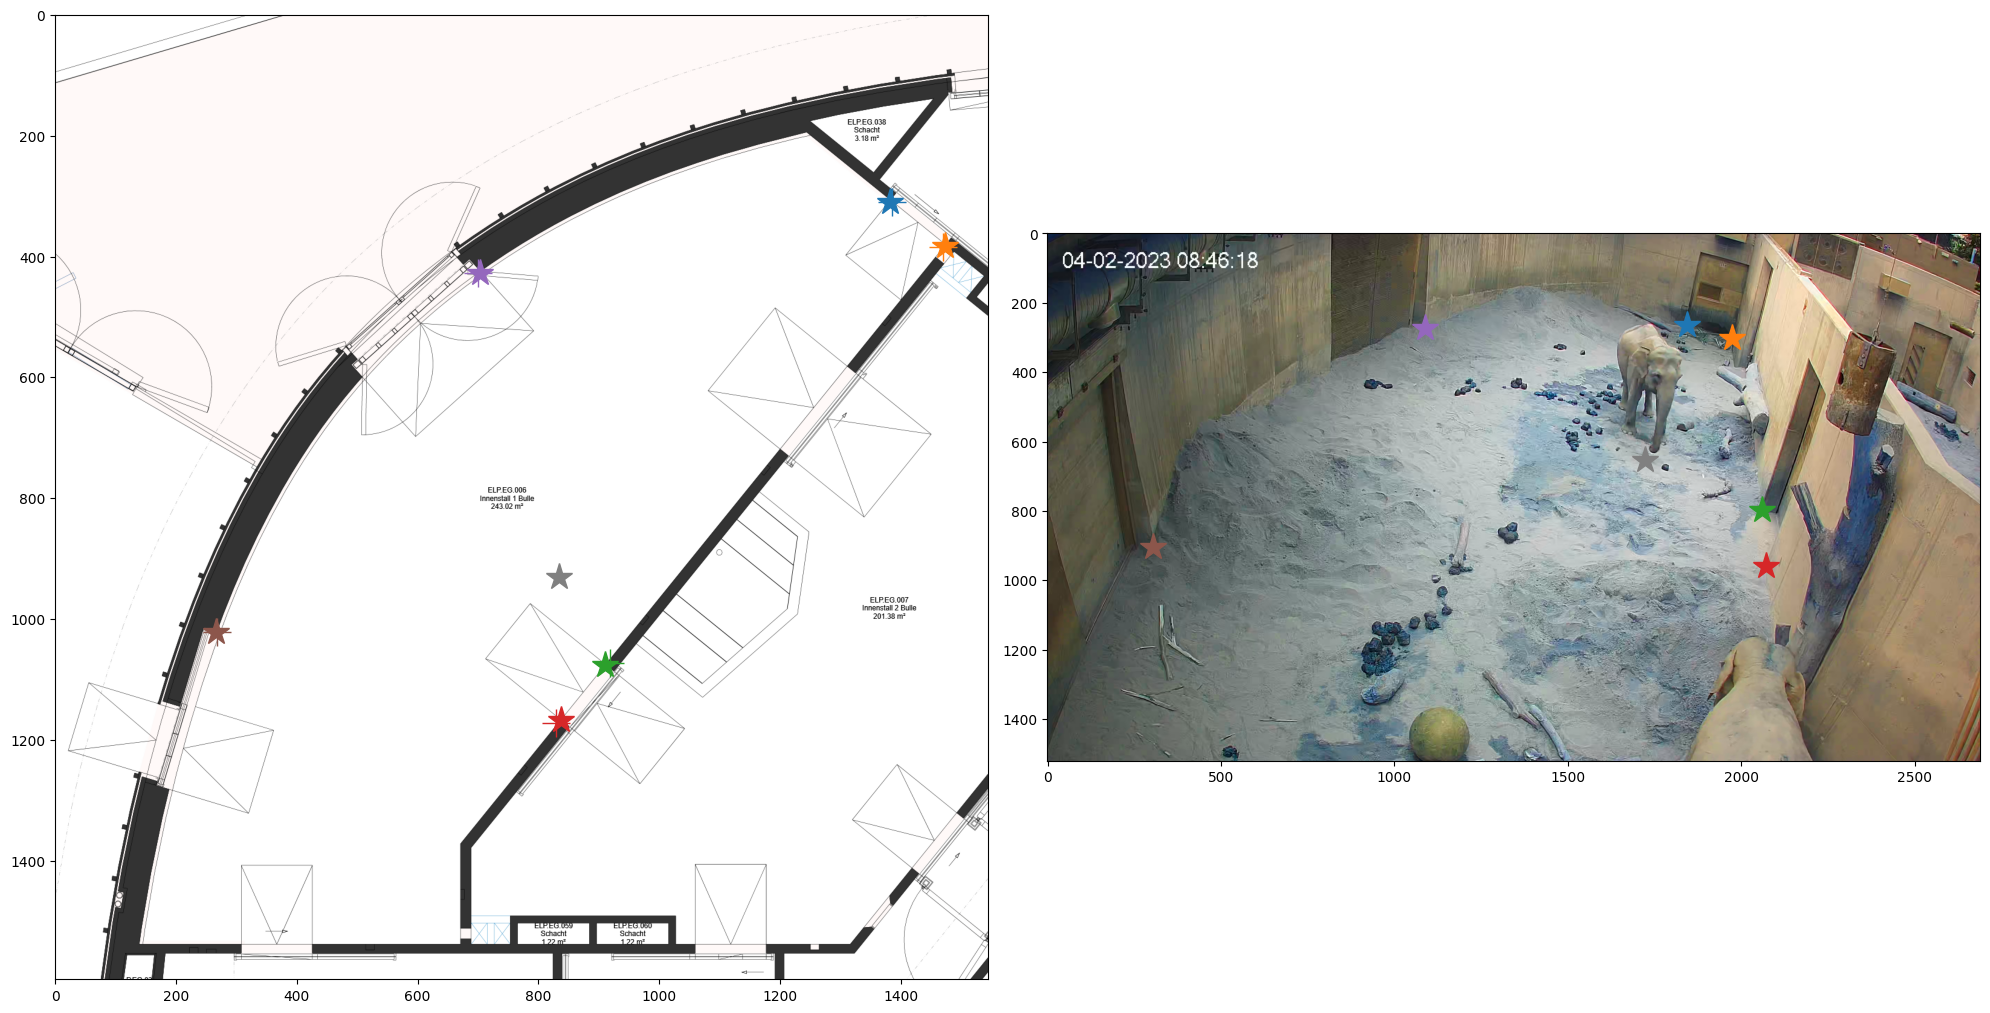

In [122]:
fig,axs = plt.subplots(1,2,figsize=(20,15))
axs[0].imshow(im_floor)
axs[1].imshow(im_camera)
for i in range(camera_points.shape[0]):
    cp = camera_points[[i]]
    wp = world_points[[i]]
    wp2 =from_h( H @ to_h(cp))
    c = f"C{i}"
    axs[0].plot(wp[0,0],wp[0,1],"*",markersize=20, color=c)
    axs[0].plot(wp2[0,0],wp2[0,1],"+",markersize=20, color=c)
    axs[1].plot(cp[0,0],cp[0,1],"*",markersize=20, color=c)
cp  = np.array([[680,258]])*2.5333
wp2 =from_h( H @ to_h(cp))
axs[1].plot(cp[0,0],cp[0,1],"*",markersize=20, color="gray")
axs[0].plot(wp2[0,0],wp2[0,1],"*",markersize=20, color="gray")
fig.tight_layout()
1061, 600

In [65]:


H,inliers=cv2.findHomography(camera_points, world_points)
display(H,inliers)

errors = np.linalg.norm(world_points - from_h(H @ to_h(camera_points)), axis=1)
print("Errors (world units): ", errors)


array([[ 4.28716658e-01,  3.31433110e-01,  1.51453816e+02],
       [-2.42112040e-01,  2.51155488e+00,  1.08188587e+01],
       [-3.41117764e-04,  1.39948654e-03,  1.00000000e+00]])

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

Errors (world units):  [3.79693834 3.26416627 8.62373922 8.21542662 2.33261748 1.77905595]


In [73]:
import json
from pathlib import Path

calib_dict = {"name":"camera0","H_worldFromCamera": H.tolist()}
calib_json = json.dumps(calib_dict,indent=2)
print(calib_json)

with Path("../models/camera0/calib.json").open("w") as f:
    f.write(calib_json)

{
  "name": "camera0",
  "H_worldFromCamera": [
    [
      0.42871665789295416,
      0.3314331104983808,
      151.4538156483546
    ],
    [
      -0.24211203977631737,
      2.5115548814921005,
      10.818858699626482
    ],
    [
      -0.0003411177635365288,
      0.0013994865410113194,
      0.9999999999999999
    ]
  ]
}


In [78]:
# 468, 437
p = np.array([[680,258,1]]).reshape((3,1))
from_h(H@p)

array([[468.06075567, 437.65881785]])